### <center><Strong> ORCL-DS-APP</Strong></center>
<br>
<br>
<Strong> <center><h2>Team : PGX-DS-T 10000   </h2></center>  </Strong>
<br>
<br>
<br>


<strong><h3>Khalid Lemouden</h3><Strong/>
    <p>Lemouden.ensa@uhp.ac.ma</p>
    <p>08/03/2024</p>



##  Twitter Text Classification ( Sports and Politics )


1. **Feature Extraction**


2. **Analysis**
   

3. **Model Training**


4. **Hyperparameter tuning**


5. **Performance**


6. **Submission**


#### This project aims to demonstrate the capability of machine learning techniques to classify tweets into ( Sports and Politics ) categories.

# 1- Feature Extraction 

In [1]:
import pandas as pd
import optuna
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import string
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import re
from imblearn.pipeline import Pipeline as ImbPipeline
from nltk.corpus import stopwords
import string

2024-03-08 01:16:19.427095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 01:16:19.427188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 01:16:19.612168: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


###  Data 

In [2]:

# Load the dataset
data = pd.read_csv('/kaggle/input/deeptweets/training.csv')
test_data = df_test = pd.read_csv('/kaggle/input/deeptweets/test.csv')


In [3]:
data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


###  Data Cleaning 
  #### The text data from tweets is preprocessed to remove noise, including special characters, URLs, and mentions.



In [5]:
import re
import string

def CleanTweetstText(text):
    text = str(text).lower()  # Converts text to lowercase
    text = re.sub(r'\d+', '', text)  # Removes numbers
    text = re.sub(r'\[.*?\]', '', text)  # Removes HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Removes URLs
    text = re.sub(r"["
                  u"\U0001F600-\U0001F64F"  # Emoticons
                  u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                  u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                  u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                  u"\U00002702-\U000027B0"
                  u"\U000024C2-\U0001F251"
                  "]+", "", text)  # Removes emojis
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Removes punctuations
    
    return text


### Generate features

In [6]:
STOP = set(stopwords.words('english'))

# Define feature names
WordCount = 'WordCount'
UniqueWordCount = 'UniqueWordCount'
StopWordCount = 'StopWordCount'
URLCount = 'URLCount'
MeanWordLength = 'MeanWordLength'
CharacterCount = 'CharacterCount'
PunctuationCount = 'PunctuationCount'
HashtagCount = 'HashtagCount'
MentionCount = 'MentionCount'

def generatefeatures(data):
    for feature in [WordCount, UniqueWordCount, StopWordCount, URLCount, MeanWordLength,
                     CharacterCount, PunctuationCount, HashtagCount, MentionCount]:
        if feature == WordCount:
            data[feature] = data['TweetText'].apply(lambda x: len(str(x).split()))
        elif feature == UniqueWordCount:
            data[feature] = data['TweetText'].apply(lambda x: len(set(str(x).split())))
        elif feature == StopWordCount:
            data[feature] = data['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOP]))
        elif feature == URLCount:
            data[feature] = data['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
        elif feature == MeanWordLength:
            data[feature] = data['TweetText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
        elif feature == CharacterCount:
            data[feature] = data['TweetText'].apply(lambda x: len(str(x)))
        elif feature == PunctuationCount:
            data[feature] = data['TweetText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
        elif feature == HashtagCount:
            data[feature] = data['TweetText'].apply(lambda x: x.count('#'))
        elif feature == MentionCount:
            data[feature] = data['TweetText'].apply(lambda x: x.count('@'))
    
    return data


data = generatefeatures(data)
test_data = generatefeatures(test_data)


### Preprocessing

In [7]:
data['TextClean'] = data['TweetText'].apply(CleanTweetstText)


# Preprocessing
X = data["TweetText"].values
y = data["Label"].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### Tokenization & Split

In [8]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
max_sequence_length = max(len(sequence) for sequence in X)
X = pad_sequences(X, maxlen=max_sequence_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2 - Analysis

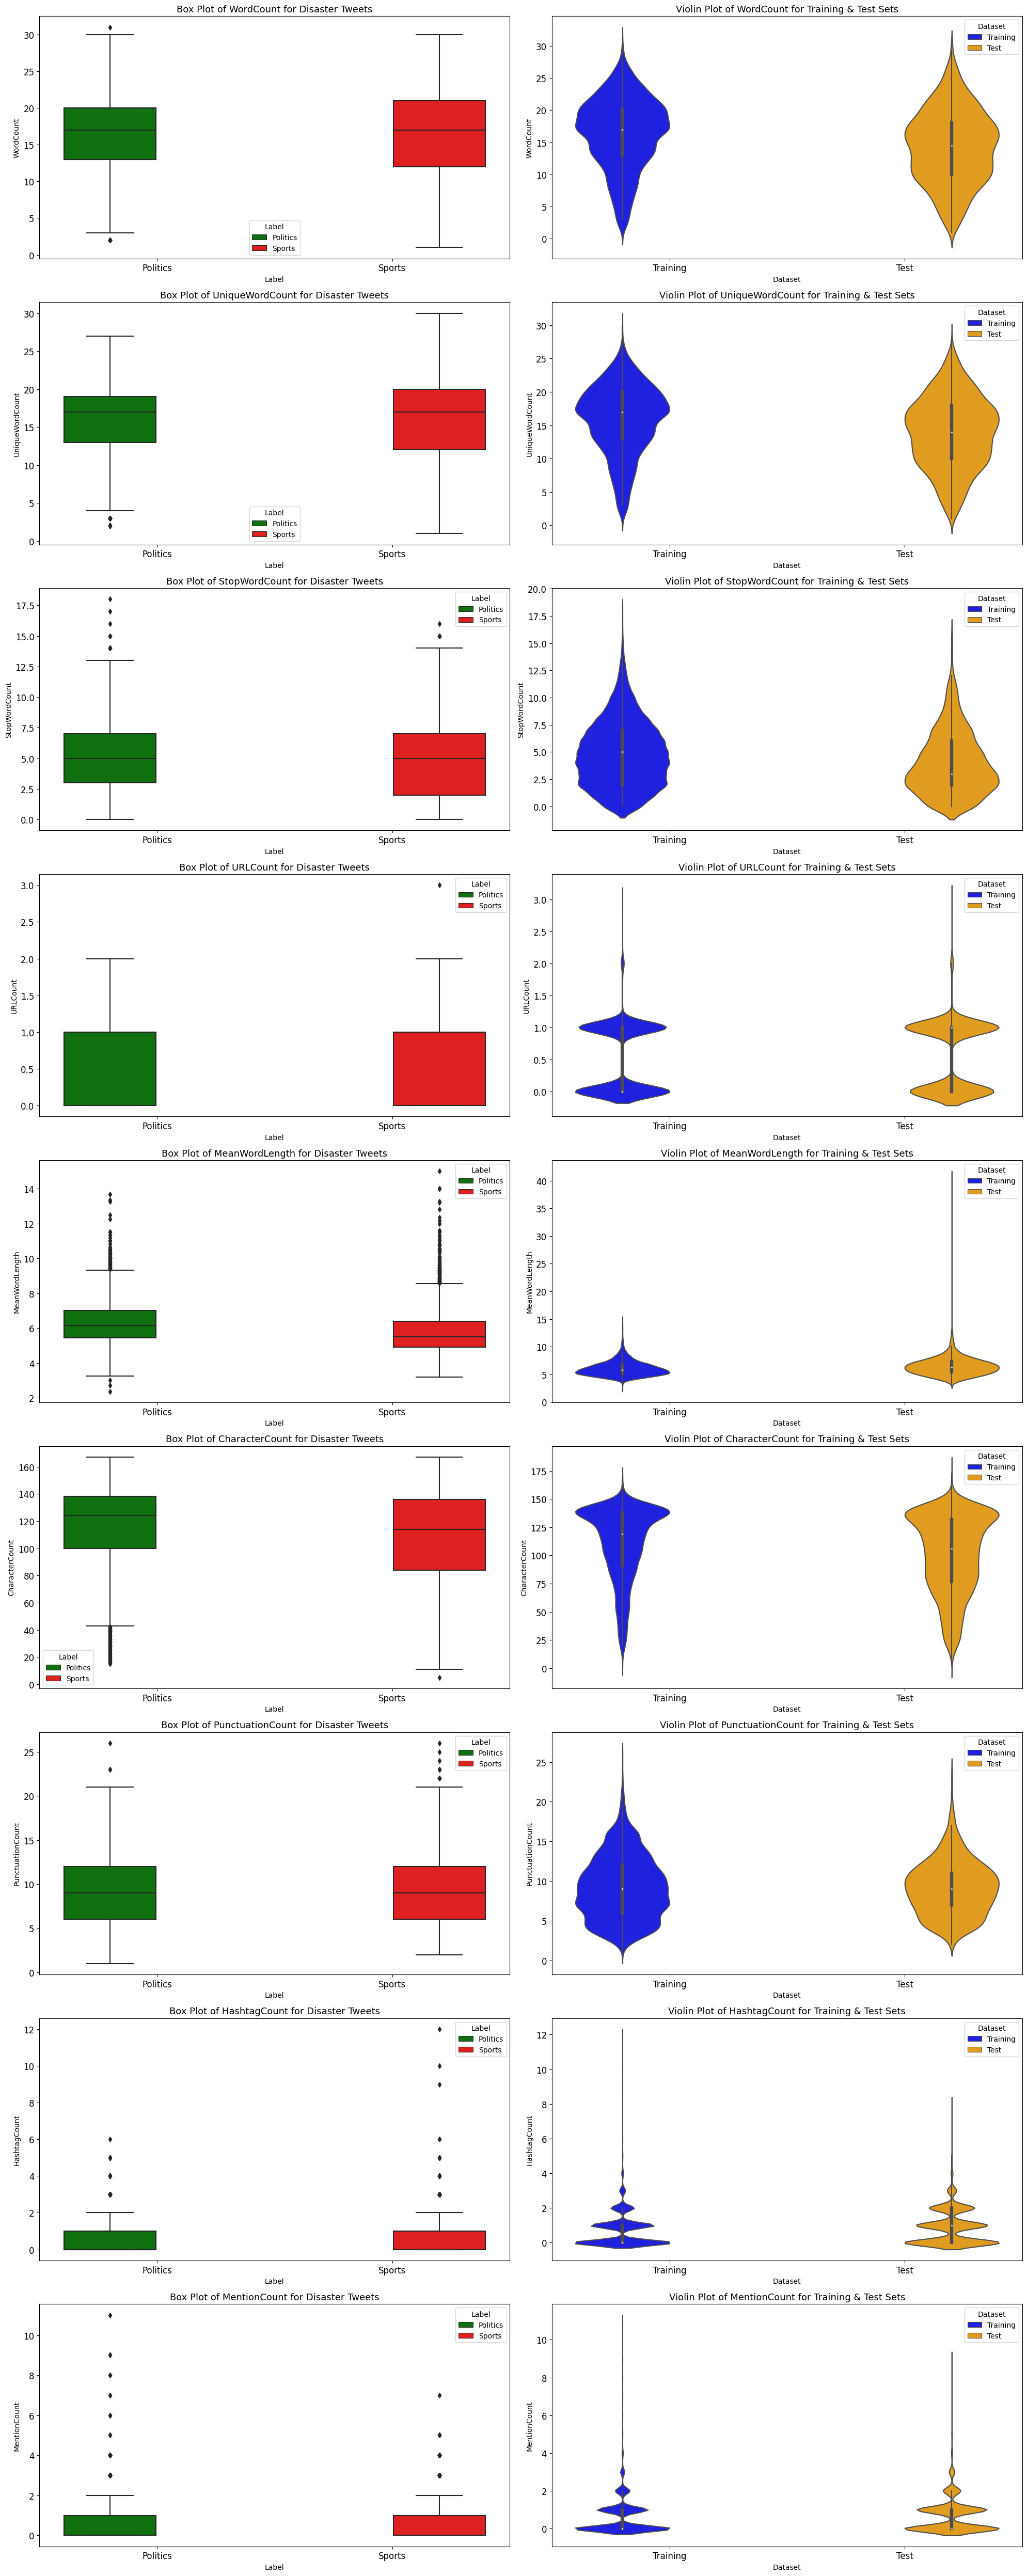

In [9]:

# Create subplots
fig, axes = plt.subplots(9, 2, figsize=(20, 50), dpi=100)

# Plot box plots for each feature
for i, feature in enumerate([WordCount, UniqueWordCount, StopWordCount, URLCount, MeanWordLength,
                             CharacterCount, PunctuationCount, HashtagCount, MentionCount]):
    sns.boxplot(x='Label', y=feature, data=data, ax=axes[i, 0], hue='Label', palette=['green', 'red'])
    axes[i, 0].set_title(f'Box Plot of {feature} for Disaster Tweets', fontsize=13)
    axes[i, 0].set_xlabel('Label')
    axes[i, 0].set_ylabel(feature)
    axes[i, 0].tick_params(axis='x', labelsize=12)
    axes[i, 0].tick_params(axis='y', labelsize=12)

# Plot violin plots for each feature
for i, feature in enumerate([WordCount, UniqueWordCount, StopWordCount, URLCount, MeanWordLength,
                             CharacterCount, PunctuationCount, HashtagCount, MentionCount]):
    sns.violinplot(x='Dataset', y=feature, data=pd.concat([data.assign(Dataset='Training'),
                                                           test_data.assign(Dataset='Test')]),
                   ax=axes[i, 1], hue='Dataset', palette=['blue', 'orange'], legend=False)
    axes[i, 1].set_title(f'Violin Plot of {feature} for Training & Test Sets', fontsize=13)
    axes[i, 1].set_xlabel('Dataset')
    axes[i, 1].set_ylabel(feature)
    axes[i, 1].tick_params(axis='x', labelsize=12)
    axes[i, 1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


#### Analysis of Box Plots:

Upon plotting the box plots to compare the behavior of the data, it's evident that they exhibit a consistent pattern, ranging from 90% to 97%. This consistency suggests that the distribution of our data can be characterized as Bernoulli. However, given that we're dealing with multiple variables (Xn), a more suitable distribution for our case would be multinomial (A multinomial experiment is characterized by a multinomial distribution), which aligns better with our dataset's characteristics.

Furthermore, while analyzing the box plots, I observed the presence of outliers. Despite their existence, they don't seem to exert a significant impact on our data's overall distribution and behavior.


# 3. Model Training

In [10]:


# Assuming CleanTweetstText is defined somewhere to clean the text data
data['TextClean'] = data['TweetText'].apply(CleanTweetstText)
test_data['TextClean'] = test_data['TweetText'].apply(CleanTweetstText)


# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['TweetText'])
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the parameter grid for GridSearchCV

# Initialize the Multinomial Naive Bayes model (alpha=1.7778 )
model = MultinomialNB(alpha=1.7778)




# 4. Hyperparameter tuning 

In [11]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Example values for alpha
}
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(alpha=1.7778), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]}, scoring='accuracy')

In [12]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

## 5. Performance

Classification Report for Test Set:
              precision    recall  f1-score   support

    Politics       0.97      0.95      0.96       630
      Sports       0.96      0.97      0.96       675

    accuracy                           0.96      1305
   macro avg       0.96      0.96      0.96      1305
weighted avg       0.96      0.96      0.96      1305

Training Score: 1.00
Testing Score: 0.96


<Figure size 800x600 with 0 Axes>

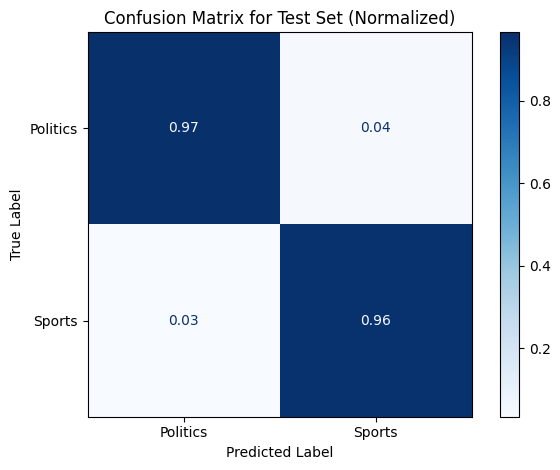

In [13]:
# Print classification report and scores for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_predict_test))

# Print training and testing scores
print(f"Training Score: {grid_search.score(X_train, y_train):.2f}")
print(f"Testing Score: {grid_search.score(X_test, y_test):.2f}")

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
conf_matrix_test = confusion_matrix(y_test, y_predict_test, normalize='pred')
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["Politics", "Sports"])

# Set colors for the confusion matrix
colors = ["red", "blue"]
disp_test.plot(cmap=plt.cm.Blues, values_format='.2f')

# Modify labels and other plot properties
plt.title('Confusion Matrix for Test Set (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=["Politics", "Sports"])
plt.yticks(ticks=[0, 1], labels=["Politics", "Sports"])

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

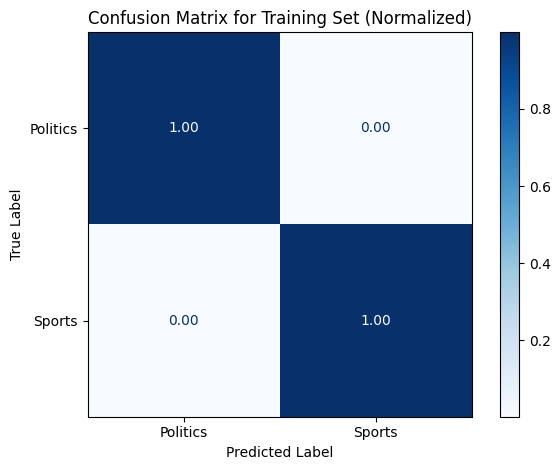

In [14]:
# Plot confusion matrix for the training set
plt.figure(figsize=(8, 6))
conf_matrix_train = confusion_matrix(y_train, y_predict_train, normalize='pred')
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["Politics", "Sports"])

# Set colors for the confusion matrix
colors = ["red", "blue"]
disp_train.plot(cmap=plt.cm.Blues, values_format='.2f')

# Modify labels and other plot properties
plt.title('Confusion Matrix for Training Set (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=["Politics", "Sports"])
plt.yticks(ticks=[0, 1], labels=["Politics", "Sports"])

plt.tight_layout()
plt.show()


In [15]:
test_data['TextClean'] = test_data['TweetText'].apply(CleanTweetstText)
vectorizer = TfidfVectorizer()
X_train_f = vectorizer.fit_transform(data['TextClean']).toarray()
X_test_f = vectorizer.transform(test_data['TextClean']).toarray()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  
}
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_f, y)

GridSearchCV(cv=5, estimator=MultinomialNB(alpha=1.7778), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]}, scoring='accuracy')

In [16]:
test_pred = grid_search.predict(X_test_f)

### Submission

In [17]:
# create submission filea
submission_df = pd.DataFrame({'TweetId': test_data['TweetId'], 'Label': test_pred})
submission_df.to_csv('submission_final_PGX-DS-T10000.csv', index=False)

In [18]:
submission_df.shape

(2610, 2)

 # Other methods can make My model better 
### Conditional Generative Adversarial Networks (Conditional GANs)

- Implement a Conditional GAN architecture to generate realistic tweet samples based on input labels ("Sports" or "Politics").
- Train the Conditional GAN on my labeled tweet dataset and use the generated synthetic tweets to augment my training data.
- Incorporate the augmented data into my classification model training to improve performance.

### Multimodal Reinforcement Learning

- Represent tweets as states in an RL environment, considering additional modalities like metadata or user information.
- Define actions for the RL agent based on tweet states (e.g., classifying as "Sports" or "Politics") and rewards for accurate classifications.
- Train the RL agent to classify tweets using multimodal feedback and evaluate its performance on a separate dataset.




<hr>

# <center>End</center>

**Khalid Lemouden**

<br>

**Team : PGX-DS-T <10000>**